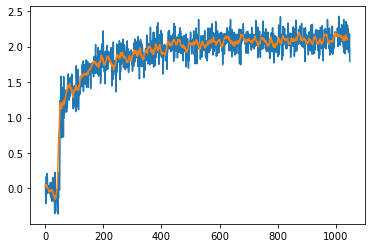

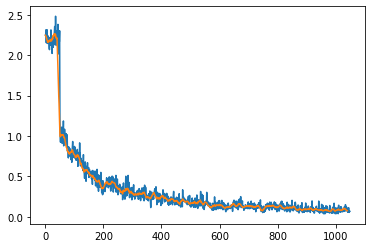

In [41]:
from ucb import UCB
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def moving_average(a, n=10, axis=None) :
    ret = np.cumsum(a, dtype=float, axis=axis)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

T = 1000
n = 100
d = 50
means = np.random.normal(size= (n, d), scale=1)
stds = abs(np.random.normal(size=(n, d), loc=1, scale=1))
size = int(2e3)

loc = np.tile(means, (T, 1, 1))
scale = np.tile(stds, (T, 1, 1))


# dataset = np.random.binomial(choices, p)
dataset = np.random.normal(loc, scale)
choices, rewards = [np.stack(x) for x in zip(*UCB().train_loop(dataset))]
rewards = rewards.mean(1)
choices = choices.astype(int)
T += d
chosen_means = means[np.tile(np.arange(n), T), choices.flatten()].reshape(T, n)
# print(means)
# print(choices)
# print(chosen_means)
avg_reward = moving_average(rewards)
avg_choice = moving_average(choices)
optimal_reward = means.max(1)
optimal_choice = means.argmax(1)
moving_optimal = moving_average(dataset, axis=0)
plt.plot(rewards)
plt.plot(moving_average(rewards))
plt.show()
regret = np.mean(optimal_reward - chosen_means, axis=-1)
avg_regret = moving_average(regret)
plt.plot(regret)
plt.plot(avg_regret)
plt.show()